## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# WEEK 3

### Consider the following dataset:
#### B. CIFAR-10 dataset [CIFAR10 small images classification dataset (keras.io)]
### For each of the Datasets A and B, do the following:
### Q1. Understanding the Dataset and Pre-processing: Implement the following:
#### a. Compute and display the number of classes.
#### b. Compute and display the dimensions of each image.
#### c. Display one image from each class.
#### d. Perform normalization.
### Q2. Performing experiments on Fully Connected Neural Networks (FCNN):
#### a. Design a FCNN which is most suitable for the given dataset:
#### Experimentally choose the best network (the intuitions and learnings from the experiments you have performed in Week-1 and Week-2 will help you choose the hyperparameters for the network).
#### b. Train and test the network (choose the best epoch size so that there is no overfitting).
#### c. Plot the performance curves.
### Q3. Performing experiments on a Convolutional Neural Networks (CNNs):
#### a. Design CNN-1 which contains:
#### • One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0.
#### • One Pooling layer which uses MAXPOOLING with stride =2.
#### • One hidden layer having number of neurons = 100
#### b. Design CNN-2 which contains:
#### • Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride = 1, and padding =0.
#### • One Pooling layer which uses MAXPOOLING with stride =2.
#### • One hidden layer having number of neurons = 100
#### Note: use ReLU activation function after each convolution layer.
#### c. Train and test the networks (choose the best epoch size so that there is no overfitting).
#### d. Plot the performance curves for CNN-1 and CNN-2.
#### e. Compare the performances of CNN-1 and CNN-2.
### Q4. Compare the performances of FCNN and CNN.
### Q5. Compare the number of parameters in the FCNN and the CNN. Which layer/s in CNN contribute most to the total number of parameters.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.backend import image_data_format
from keras.callbacks import History
from keras.datasets import cifar10
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
(x_train_color, y_train), (x_test_color, y_test) = cifar10.load_data()

Exception: URL fetch failure on https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)

In [ ]:
x_train_color[0].shape

In [ ]:
x_train: list = []
x_test: list = []

for i in range(len(x_train_color)):
    x_train.append(cv2.cvtColor(x_train_color[i], cv2.COLOR_RGB2GRAY))
for i in range(len(x_test_color)):
    x_test.append(cv2.cvtColor(x_test_color[i], cv2.COLOR_RGB2GRAY))

x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
np.unique(y_train), np.unique(y_test)

In [3]:
x_train[0].shape

NameError: name 'x_train' is not defined

In [4]:
temp: pd.DataFrame = pd.DataFrame(list(zip(x_train, y_train)), columns=["x", "y"])
for i in np.unique(y_train):
    temp2: pd.Series = temp[temp.y == i].iloc[0]
    plt.imshow(temp2.x, cmap="gray")
    plt.title(f"Class {temp2.y[0]}")
    plt.show()

NameError: name 'x_train' is not defined

In [10]:
current_shape: tuple = x_train[0].shape

# The first param to reshape() is the length of the array
imageFormat: str = image_data_format()
if imageFormat == "channels_first":
    x_train = x_train.reshape(x_train.shape[0], 1, current_shape[0], current_shape[1])
    x_test = x_test.reshape(x_test.shape[0], 1, current_shape[0], current_shape[1])
elif imageFormat == "channels_last":
        x_train = x_train.reshape(x_train.shape[0], current_shape[0], current_shape[1], 1)
        x_test = x_test.reshape(x_test.shape[0], current_shape[0], current_shape[1], 1)
else:
    print(f"Invalid format encountered: {image_data_format()}")

In [11]:
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
fcnn_model: Sequential = Sequential([
    Input(shape=x_train[0].shape),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")
])
fcnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

2024-08-14 10:14:39.385830: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-14 10:14:39.404176: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-14 10:14:39.404330: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [13]:
epochs: int = 10
batch_size: int = 128
fcnn_history: History = fcnn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10


2024-08-14 10:14:41.102075: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-08-14 10:14:41.103475: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f6c546d5900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-14 10:14:41.103489: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-08-14 10:14:41.106429: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-14 10:14:41.203058: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-08-14 10:14:41.272884: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

352/352 [==============================] - 3s 5ms/step - loss: 2.0866 - accuracy: 0.2362 - val_loss: 2.0221 - val_accuracy: 0.2614
Epoch 2/10
352/352 [==============================] - 2s 5ms/step - loss: 1.9621 - accuracy: 0.2933 - val_loss: 1.9272 - val_accuracy: 0.3118
Epoch 3/10
352/352 [==============================] - 2s 5ms/step - loss: 1.9035 - accuracy: 0.3152 - val_loss: 1.8931 - val_accuracy: 0.3164
Epoch 4/10
352/352 [==============================] - 2s 5ms/step - loss: 1.8577 - accuracy: 0.3358 - val_loss: 1.8412 - val_accuracy: 0.3446
Epoch 5/10
352/352 [==============================] - 2s 5ms/step - loss: 1.8142 - accuracy: 0.3534 - val_loss: 1.8305 - val_accuracy: 0.3548
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 1.7837 - accuracy: 0.3658 - val_loss: 1.7837 - val_accuracy: 0.3640
Epoch 7/10
352/352 [==============================] - 2s 5ms/step - loss: 1.7559 - accuracy: 0.3758 - val_loss: 1.7759 - val_accuracy: 0.3722
Epoch 8/10
352/35

In [14]:
fcnn_model.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 0s 1ms/step - loss: 1.7361 - accuracy: 0.3804


[1.7361470460891724, 0.38040000200271606]

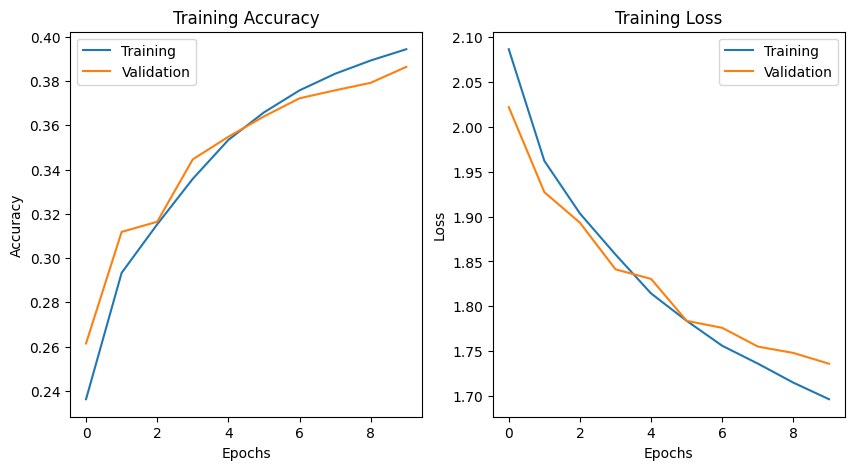

In [15]:
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Training Accuracy")
ax1.plot(fcnn_history.history["accuracy"])
ax1.plot(fcnn_history.history["val_accuracy"])
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend(["Training", "Validation"])

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Training Loss")
ax2.plot(fcnn_history.history["loss"])
ax2.plot(fcnn_history.history["val_loss"])
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["Training", "Validation"])

In [16]:
cnn_model_1: Sequential = Sequential([
    Input(shape=x_train[0].shape),
    Conv2D(32, 5, activation="relu") # Padding and strides match their defaults
])

In [17]:
cnn_model_1.add(MaxPooling2D(strides=2))

In [18]:
cnn_model_1.add(Flatten()) # Flatten the outputs of CNN
cnn_model_1.add(Dense(100, activation="relu"))

In [19]:
cnn_model_1.add(Dense(10, activation="softmax"))

In [20]:
cnn_model_2: Sequential = Sequential([
    Input(shape=x_train[0].shape),
    Conv2D(32, 3, activation="relu"), # Padding and strides match their defaults
    Conv2D(32, 3, activation="relu")
])

In [21]:
cnn_model_2.add(MaxPooling2D(strides=2))

In [22]:
cnn_model_2.add(Flatten()) # Flatten the outputs of CNN
cnn_model_2.add(Dense(100, activation="relu"))

In [23]:
cnn_model_2.add(Dense(10, activation="softmax"))

In [24]:
epochs = 10

cnn_model_1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
cnn1_history: History = cnn_model_1.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 3s 5ms/step - loss: 1.7901 - accuracy: 0.3655 - val_loss: 1.5559 - val_accuracy: 0.4502
Epoch 2/10
352/352 [==============================] - 2s 5ms/step - loss: 1.4950 - accuracy: 0.4804 - val_loss: 1.4373 - val_accuracy: 0.4962
Epoch 3/10
352/352 [==============================] - 2s 5ms/step - loss: 1.3879 - accuracy: 0.5170 - val_loss: 1.3472 - val_accuracy: 0.5348
Epoch 4/10
352/352 [==============================] - 2s 5ms/step - loss: 1.3010 - accuracy: 0.5481 - val_loss: 1.3343 - val_accuracy: 0.5384
Epoch 5/10
352/352 [==============================] - 2s 5ms/step - loss: 1.2433 - accuracy: 0.5702 - val_loss: 1.2369 - val_accuracy: 0.5694
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1873 - accuracy: 0.5877 - val_loss: 1.2370 - val_accuracy: 0.5716
Epoch 7/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1308 - accuracy: 0.6095 - val_loss: 1.1735 - val_accuracy: 0.5970
Epoch 

In [25]:
cnn_model_1.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 0s 2ms/step - loss: 1.2002 - accuracy: 0.5848


[1.2001982927322388, 0.5848000049591064]

In [26]:
epochs = 5

cnn_model_2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
cnn2_history: History = cnn_model_2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/5
352/352 [==============================] - 3s 7ms/step - loss: 1.7123 - accuracy: 0.3880 - val_loss: 1.4391 - val_accuracy: 0.4966
Epoch 2/5
352/352 [==============================] - 2s 6ms/step - loss: 1.3704 - accuracy: 0.5213 - val_loss: 1.2806 - val_accuracy: 0.5538
Epoch 3/5
352/352 [==============================] - 2s 6ms/step - loss: 1.1976 - accuracy: 0.5839 - val_loss: 1.1887 - val_accuracy: 0.5816
Epoch 4/5
352/352 [==============================] - 2s 6ms/step - loss: 1.0794 - accuracy: 0.6232 - val_loss: 1.1194 - val_accuracy: 0.6060
Epoch 5/5
352/352 [==============================] - 2s 6ms/step - loss: 0.9833 - accuracy: 0.6579 - val_loss: 1.0907 - val_accuracy: 0.6202


In [27]:
cnn_model_2.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 0s 3ms/step - loss: 1.1216 - accuracy: 0.6055


[1.121612548828125, 0.6054999828338623]

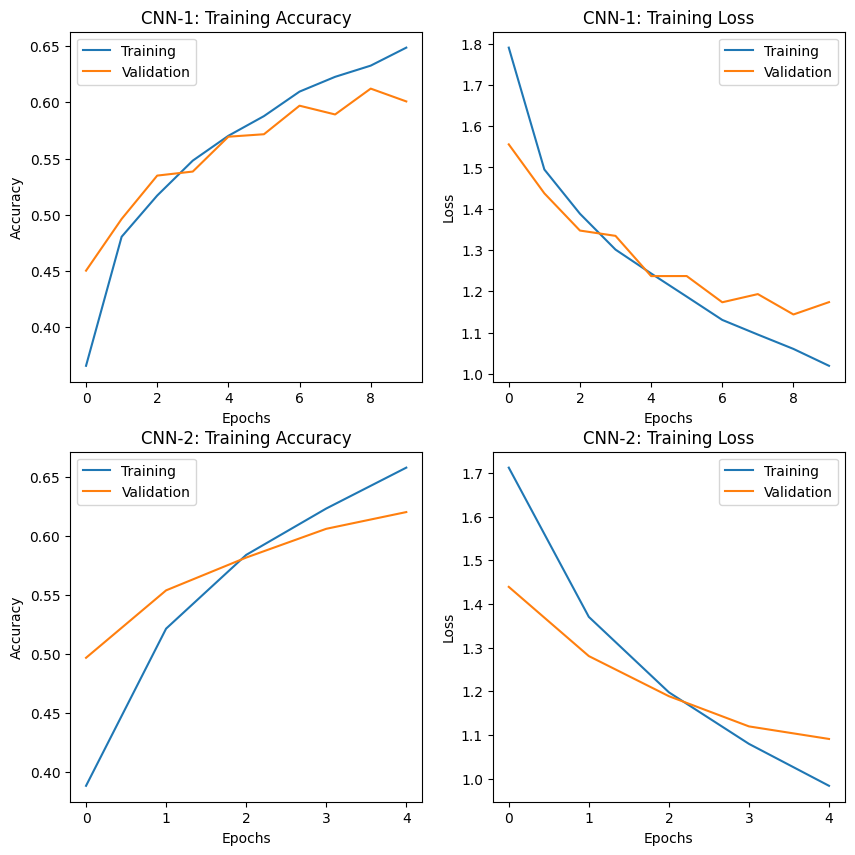

In [28]:
plt.figure(figsize=(10, 10))

ax1 = plt.subplot(2, 2, 1)
ax1.set_title("CNN-1: Training Accuracy")
ax1.plot(cnn1_history.history["accuracy"])
ax1.plot(cnn1_history.history["val_accuracy"])
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend(["Training", "Validation"])

ax2 = plt.subplot(2, 2, 2)
ax2.set_title("CNN-1: Training Loss")
ax2.plot(cnn1_history.history["loss"])
ax2.plot(cnn1_history.history["val_loss"])
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(["Training", "Validation"])

ax3 = plt.subplot(2, 2, 3)
ax3.set_title("CNN-2: Training Accuracy")
ax3.plot(cnn2_history.history["accuracy"])
ax3.plot(cnn2_history.history["val_accuracy"])
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Accuracy")
ax3.legend(["Training", "Validation"])

ax4 = plt.subplot(2, 2, 4)
ax4.set_title("CNN-2: Training Loss")
ax4.plot(cnn2_history.history["loss"])
ax4.plot(cnn2_history.history["val_loss"])
ax4.set_xlabel("Epochs")
ax4.set_ylabel("Loss")
ax4.legend(["Training", "Validation"])

In [29]:
cnn_model_1.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 0s 2ms/step - loss: 1.2002 - accuracy: 0.5848


[1.2001982927322388, 0.5848000049591064]

In [30]:
cnn_model_2.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 0s 3ms/step - loss: 1.1216 - accuracy: 0.6055


[1.121612548828125, 0.6054999828338623]

In [31]:
fcnn_model.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 0s 1ms/step - loss: 1.7361 - accuracy: 0.3804


[1.7361470460891724, 0.38040000200271606]

In [32]:
cnn_model_2.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 0s 3ms/step - loss: 1.1216 - accuracy: 0.6055


[1.121612548828125, 0.6054999828338623]

In [33]:
fcnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 141866 (554.16 KB)
Trainable params: 141866 (554.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
cnn_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               627300    
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                      